In [3]:
cd

C:\Users\vigne


C:\Users\vigne\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\magics\osm.py:428: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
import cv2
import pandas as pd
import glob

In [6]:

# Example DataBase
data = {
    'vehicle_id': ['SS2048',
                   '01AS4444',
                   'DL2CAT4762.',
                   'N21234E',
                   'V8LUV',
                  '9927TC0830',
                   'BJ69HED',
                   'N21234E',
                   'P 7CD5017',
                   'V8LUV',
                  '1SS2048',
                   'DL2CAT4Z762',
                   'WH12DE1433',
                   '2CAT4762',
                   'RJ27TC0530',
                  'HR26CO6869',
                   'MH14TC2061AN',
                   'A107',
                   'AP2015BA',
                   'V8LUV'],
    'ENTRY DATE': ['10/1/2022 12:00:09 AM',
                   '10/1/2022 12:01:49 AM',
                   '10/1/2022 12:02:54 AM',
                   '10/1/2022 12:12:30 AM',
                   '10/1/2022 12:15:24 AM',
                  '10/1/2022 1:00:14 AM',
                   '10/1/2022 2:01:49 AM',
                   '10/1/2022 3:02:54 AM',
                   '10/1/2022 3:12:30 AM',
                   '10/1/2022 4:15:24 AM',
                  '10/1/2022 9:01:11 AM',
                   '10/1/2022 10:01:49 AM',
                   '10/1/2022 11:02:54 AM',
                   '10/1/2022 12:12:30 PM',
                   '10/1/2022 1:18:24 PM',
                  '10/1/2022 2:00:14 PM',
                   '10/1/2022 3:01:49 PM',
                   '10/1/2022 4:02:54 PM',
                   '10/1/2022 5:12:30 PM',
                   '10/1/2022 6:15:24 PM'],
    'EXIT DATE': ['10/1/2022 12:22:20 AM',
                  '10/1/2022 12:06:13 AM',
                  '10/1/2022 12:22:19 AM',
                  '10/1/2022 12:23:35 AM',
                  '10/1/2022 12:22:32 AM',
                  '10/1/2022 2:00:09 AM',
                   '10/1/2022 3:01:49 AM',
                   '10/1/2022 4:02:54 AM',
                   '10/1/2022 4:12:30 AM',
                   '10/1/2022 5:15:24 AM',
                 '10/1/2022 11:01:11 AM',
                   '10/1/2022 11:01:49 AM',
                   '10/1/2022 12:02:54 AM',
                   '10/1/2022 1:12:30 PM',
                   '10/1/2022 2:18:24 PM',
                  '10/1/2022 3:00:14 PM',
                   '10/1/2022 4:01:49 PM',
                   '10/1/2022 7:02:54 PM',
                   '10/1/2022 6:12:30 PM',
                   '10/1/2022 8:15:24 PM'],
    'TYPE': ['Short term parking',
             'Short term parking',
             'Short term parking',
             'Short term parking',
             'Short term parking',
            'Long term parking',
             'Long term parking',
             'Long term parking',
             'Long term parking',
             'Long term parking',
            'Short term parking',
             'Short term parking',
             'Short term parking',
             'Short term parking',
             'Short term parking',
            'Long term parking',
             'Long term parking',
             'Long term parking',
             'Long term parking',
             'Long term parking'],
    'parking_lot': ['A',
                   'C',
                   'F',
                   'A',
                   'B',
                  'C',
                   'H',
                   'F',
                   'A',
                   'B',
                  'C',
                   'D',
                   'G',
                   'D',
                   'A',
                  'F',
                   'E',
                   'B',
                   'A',
                   'C']
}
print(type(data))
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)
print(type(df))

# Convert the 'ENTRY DATE' and 'EXIT DATE' columns to datetime
df['ENTRY DATE'] = pd.to_datetime(df['ENTRY DATE'])
df['EXIT DATE'] = pd.to_datetime(df['EXIT DATE'])

# Create a DataFrame with all events
entry_events = pd.DataFrame({'time': df['ENTRY DATE'], 'change': 1})
exit_events = pd.DataFrame({'time': df['EXIT DATE'], 'change': -1})

# Concatenate entry and exit events
events = pd.concat([entry_events, exit_events]).sort_values('time').reset_index(drop=True)

# Calculate occupancy
events['occupancy'] = events['change'].cumsum()


<class 'dict'>
<class 'pandas.core.frame.DataFrame'>


C:\Users\vigne\AppData\Local\Temp\ipykernel_23712\1952380200.py:110: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ENTRY DATE'] = pd.to_datetime(df['ENTRY DATE'])
C:\Users\vigne\AppData\Local\Temp\ipykernel_23712\1952380200.py:111: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['EXIT DATE'] = pd.to_datetime(df['EXIT DATE'])


In [7]:
#Preprocessing the train images
import pytesseract
# Preprocess the image
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    gray = cv2.bilateralFilter(gray, 11, 17, 17)    # Apply bilateral filter to reduce noise
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)  # Apply thresholding
    return thresh

# Tesseract configuration
custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

# Get list of image file paths
image_files = glob.glob("Vehicle_moment_analysis/License-Plate-Detector-2/train/images/*.jpg")  # Adjust the pattern as needed
tesseract_result_train = []
# Process each image
for image_path in image_files:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        continue
    
    preprocessed_image = preprocess_image(image)
    
    # Extract license plate using Tesseract
    tesseract_result_train.append(pytesseract.image_to_string(preprocessed_image, config=custom_config))


In [8]:
df.fillna(method='ffill',inplace = True)

C:\Users\vigne\AppData\Local\Temp\ipykernel_23712\4205896538.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace = True)


In [9]:
df['ENTRY DATE'] = pd.to_datetime(df['ENTRY DATE'])
df['EXIT DATE'] = pd.to_datetime(df['EXIT DATE'])

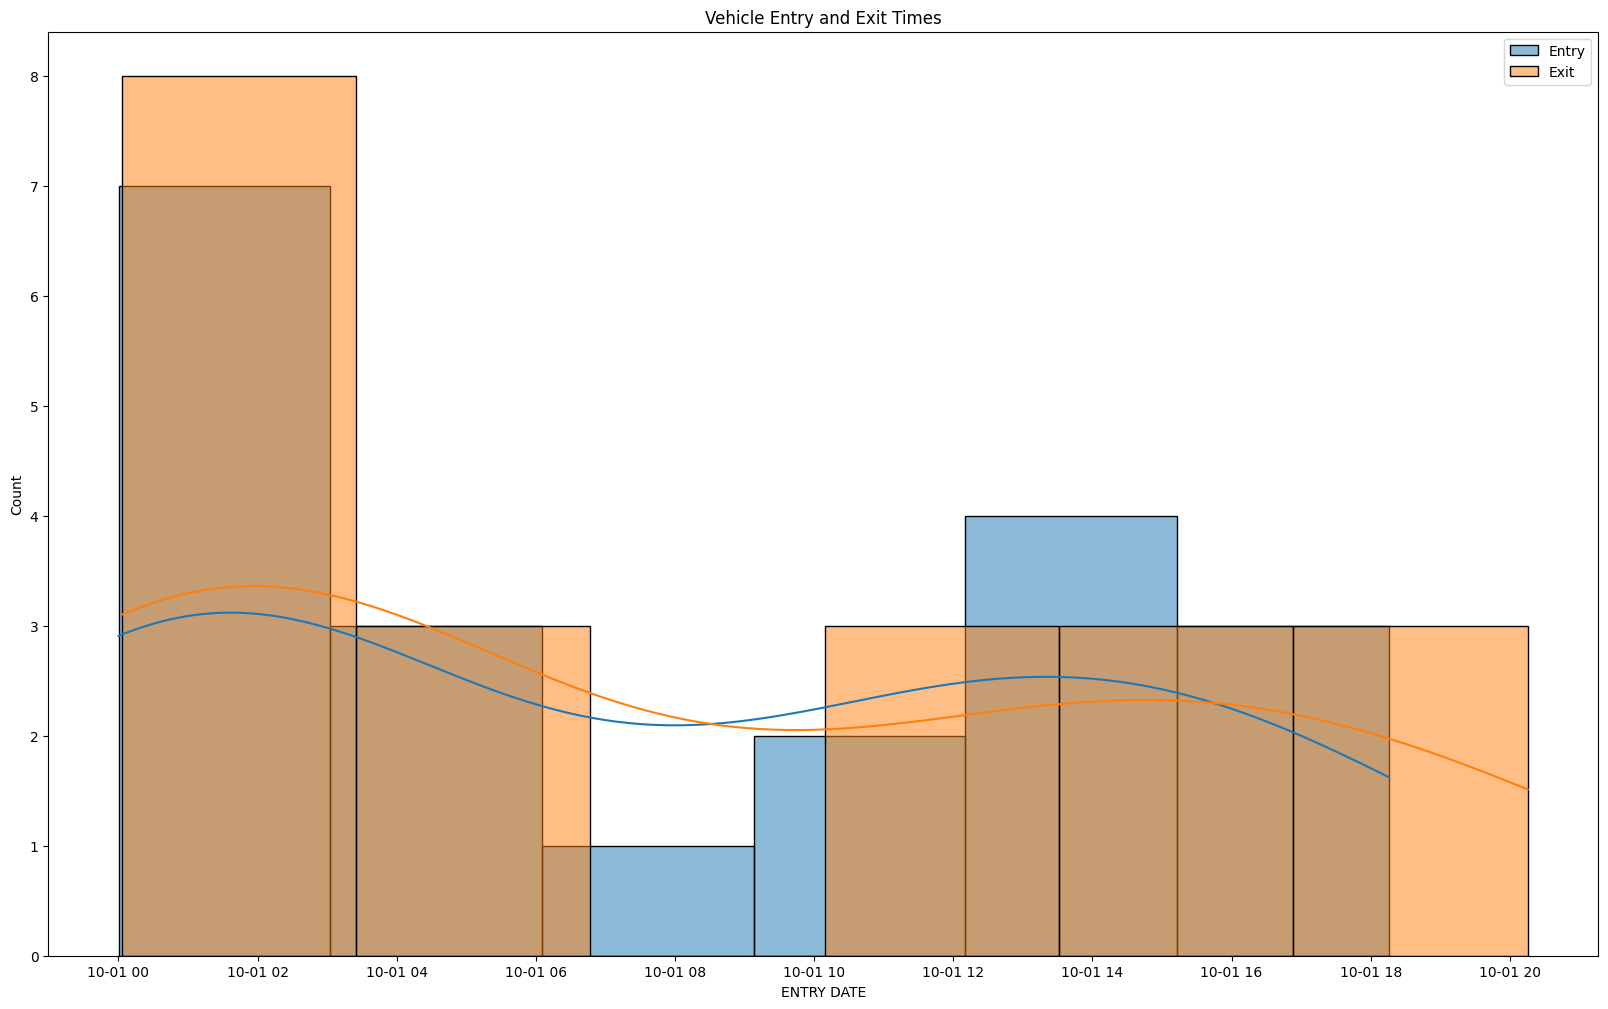

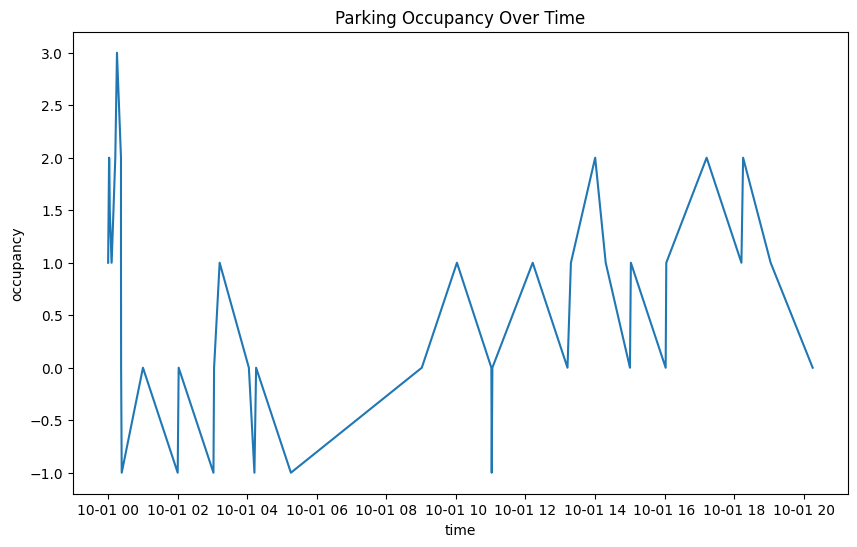

In [10]:
#Vehicle Entry and Exit times
import matplotlib.pyplot as plt
import seaborn as sns

#Vehicle entry and exit times
plt.figure(figsize=(20,12))
sns.histplot(df['ENTRY DATE'], kde=True, label='Entry')
sns.histplot(df['EXIT DATE'], kde=True, label='Exit')
plt.legend()
plt.title('Vehicle Entry and Exit Times')
plt.show()

#parking occupency over time
plt.figure(figsize=(10,6))
sns.lineplot(x='time', y='occupancy', data=events)
plt.title('Parking Occupancy Over Time')
plt.show()

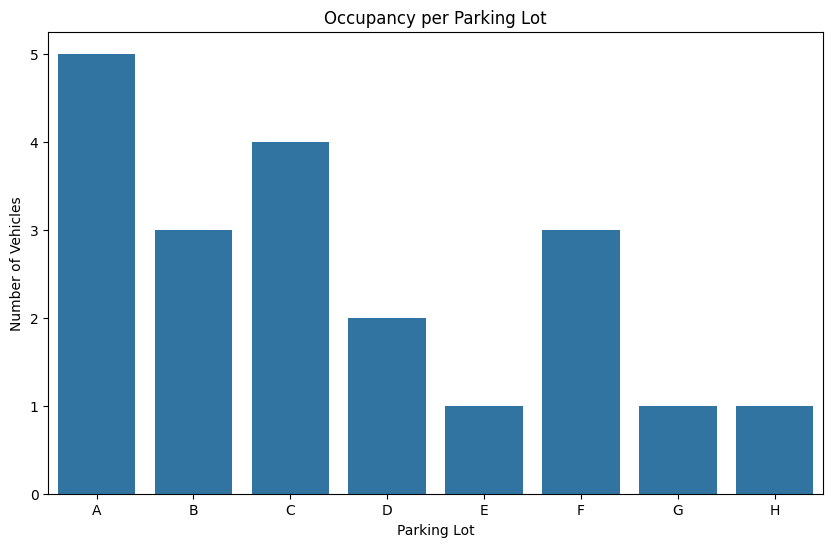

In [11]:
#Occupancy per parking lot
movement_patterns = df.groupby('vehicle_id').agg({'ENTRY DATE': 'min', 'EXIT DATE': 'max'})
movement_patterns ['duration'] = movement_patterns['EXIT DATE'] - movement_patterns['ENTRY DATE']
# Generate insights on parking occupancy
# Calculate duration of parking for each vehicle
df['duration'] = (df['EXIT DATE'] - df['ENTRY DATE']).dt.total_seconds() / 3600
occupancy = df.groupby('parking_lot').size().reset_index(name='occupancy')

# Visualize occupancy
plt.figure(figsize=(10,6))
sns.barplot(x='parking_lot', y='occupancy', data=occupancy)
plt.title('Occupancy per Parking Lot')
plt.xlabel('Parking Lot')
plt.ylabel('Number of Vehicles')
plt.show()


In [12]:
cd

C:\Users\vigne


C:\Users\vigne\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
C:\Users\vigne\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\magics\osm.py:428: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [13]:
import cv2
import pandas as pd
from ultralytics import YOLO
import cvzone
import numpy as np
import pytesseract
from datetime import datetime

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
model = YOLO('Vehicle_moment_analysis/detect/train9/weights/best.pt')


WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at 'C:\Users\vigne\AppData\Roaming\Ultralytics\settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [14]:
#def RGB(event, x, y, flags, param):
#    if event == cv2.EVENT_MOUSEMOVE:
#        point = [x, y]
#        print(point)
cv2.namedWindow('RGB')
#cv2.setMouseCallback('RGB', RGB)

cap = cv2.VideoCapture('Vehicle_moment_analysis/mycarplate.mp4')

my_file = open('Vehicle_moment_analysis/class.txt',"r")
data = my_file.read()
class_list = data.split("\n")

area = [(50, 198), (50, 324), (850 , 324), (850, 198)]

count = 0
list1 = []
processed_numbers = set()

#custom configuration of tesseract for better output
custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

#open file for writing car plate data
with open("car_plate_date.txt", "a") as file:
    file.write("NumberPlate\tDate\tTime\n")

while True:
    ret, frame = cap.read() 
    count += 1
    if count % 2 != 0:
        continue
    if not ret:
        break
    frame = cv2.resize(frame, (1020, 500))
    results = model.predict(frame)
    a = results[0].boxes.data
    px = pd.DataFrame(a).astype("float")
    for index, row in px.iterrows():
        x1 = int(row[0])
        y1 = int(row[1])
        x2 = int(row[2])
        y2 = int(row[3])

        d = int(row[5])
        c = class_list[d]
        cx = int(x1+x2) // 2
        cy = int(y1 + y2) // 2  
        result = cv2.pointPolygonTest(np.array(area, np.int32), ((cx, cy)), False)
        if result >= 0:
            crop = frame[y1:y2, x1:x2]
            gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
            gray = cv2.bilateralFilter(gray, 15, 17, 17)

            text = pytesseract.image_to_string(gray, config=custom_config).strip()
            text = text.replace('(', '').replace(')', '').replace(',', '')
            print(text)
            if text not in processed_numbers:
                processed_numbers.add(text)
                list1.append(text)
                current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                with open("car_plate_data.txt", "a") as file:
                    file.write(f"{text}\t{current_datetime}\n")
            cv2.rectangle(frame, (x1,y1), (x2,y2), (0, 255,0), 2)
            cv2.imshow('crop', crop)
    print(list1)
    cv2.polylines(frame, [np.array(area, np.int32)], True, (255, 0, 0), 2)
    cv2.imshow("RGB", frame)
    if cv2.waitKey(0) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()
                                                           
            


0: 320x640 1 LicensePlate, 236.8ms
Speed: 7.0ms preprocess, 236.8ms inference, 5.9ms postprocess per image at shape (1, 3, 320, 640)
[]

0: 320x640 1 LicensePlate, 111.6ms
Speed: 5.1ms preprocess, 111.6ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 640)
[]

0: 320x640 1 LicensePlate, 94.3ms
Speed: 1.7ms preprocess, 94.3ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 640)
[]

0: 320x640 1 LicensePlate, 103.6ms
Speed: 0.0ms preprocess, 103.6ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 640)
[]

0: 320x640 1 LicensePlate, 92.9ms
Speed: 0.0ms preprocess, 92.9ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 640)
A 7CD5017
['A 7CD5017']

0: 320x640 1 LicensePlate, 99.0ms
Speed: 2.6ms preprocess, 99.0ms inference, 11.9ms postprocess per image at shape (1, 3, 320, 640)
A 7CD5017
['A 7CD5017']

0: 320x640 1 LicensePlate, 90.8ms
Speed: 2.4ms preprocess, 90.8ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 640)
P 7CD5017

In [22]:
matches = []
for plate in list1:
    for vehicle_id in df['vehicle_id']:
        if(plate == vehicle_id):
            matches.append(plate)
for i in matches:
    if(len(i)>4):
        print(''.join(i.splitlines())+"  Matched with the database")
        print("--------------------------------------------------------")

P 7CD5017  Matched with the database
--------------------------------------------------------
DL2CAT4Z762  Matched with the database
--------------------------------------------------------
HR26CO6869  Matched with the database
--------------------------------------------------------


In [13]:
#converting to Tensorflow lite model
import torch
import onnx
from onnx_tf.backend import prepare
import tensorflow as tf

# Step 1: Export PyTorch model to ONNX
dummy_input = torch.randn(1, 3, 416, 416)  # Example input shape
torch.onnx.export(runs/detect/train9/weights/best.pt, dummy_input, "model.onnx", opset_version=11)

# Step 2: Load the ONNX model and convert to TensorFlow Lite
onnx_model = onnx.load("model.onnx")
tf_rep = prepare(onnx_model)
tflite_model = tf_rep.export_graph()

# Save the TensorFlow Lite model
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

ModuleNotFoundError: No module named 'onnx_tf'

In [ ]:
jjh